In [2]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
import xgboost as xg
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Desktop\imarticus\4 linear OLS\ProjectonPropertyPricePrediction\Dataset\HousePrices.csv")
data

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [4]:
data=data.drop(["Id"],axis=1)

In [5]:
data.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.isnull().sum()

Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
Road_Type                0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 80, dtype: int64

In [7]:
col=data.columns

col

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [8]:
null=[]
for i in col:
    if data[i].isnull().sum() != 0:
        null.append(i)
        print(i,data[i].isnull().sum())

LotFrontage 320
Alley 1944
MasVnrType 14
MasVnrArea 14
BsmtQual 59
BsmtCond 59
BsmtExposure 61
BsmtFinType1 59
BsmtFinType2 60
Electrical 1
FireplaceQu 988
GarageType 113
GarageYrBlt 113
GarageFinish 113
GarageQual 113
GarageCond 113
PoolQC 2065
Fence 1669
MiscFeature 1993


In [9]:
null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' Alley ')  ,display(data['Alley'].unique())
display(' MasVnrType ')  ,display(data['MasVnrType'].unique())
display(' MasVnrArea ')  ,display(data['MasVnrArea'].unique())
display(' BsmtQual ')  ,display(data['BsmtQual'].unique())
display(' BsmtCond ')  ,display(data['BsmtCond'].unique())
display(' BsmtExposure ')  ,display(data['BsmtExposure'].unique())
display(' BsmtFinType1 ')  ,display(data['BsmtFinType1'].unique())
display(' BsmtFinType2 ')  ,display(data['BsmtFinType2'].unique())
display(' Electrical ')  ,display(data['Electrical'].unique())
display(' FireplaceQu ')  ,display(data['FireplaceQu'].unique())
display(' GarageType ')  ,display(data['GarageType'].unique())
display(' GarageYrBlt ')  ,display(data['GarageYrBlt'].unique())
display(' GarageFinish ')  ,display(data['GarageFinish'].unique())
display(' GarageQual ')  ,display(data['GarageQual'].unique())
display(' GarageCond ')  ,display(data['GarageCond'

In [11]:
display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' Alley ')  ,display(data['Alley'].unique())
display(' MasVnrType ')  ,display(data['MasVnrType'].unique())
display(' MasVnrArea ')  ,display(data['MasVnrArea'].unique())
display(' BsmtQual ')  ,display(data['BsmtQual'].unique())
display(' BsmtCond ')  ,display(data['BsmtCond'].unique())
display(' BsmtExposure ')  ,display(data['BsmtExposure'].unique())
display(' BsmtFinType1 ')  ,display(data['BsmtFinType1'].unique())
display(' BsmtFinType2 ')  ,display(data['BsmtFinType2'].unique())
display(' Electrical ')  ,display(data['Electrical'].unique())
display(' FireplaceQu ')  ,display(data['FireplaceQu'].unique())
display(' GarageType ')  ,display(data['GarageType'].unique())
display(' GarageYrBlt ')  ,display(data['GarageYrBlt'].unique())
display(' GarageFinish ')  ,display(data['GarageFinish'].unique())
display(' GarageQual ')  ,display(data['GarageQual'].unique())
display(' GarageCond ')  ,display(data['GarageCond'].unique())
display(' PoolQC ')  ,display(data['PoolQC'].unique())
display(' Fence ')  ,display(data['Fence'].unique())
display(' MiscFeature ')  ,display(data['MiscFeature'].unique())

' LotFrontage '

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

' Alley '

array([nan, 'Grvl', 'Pave'], dtype=object)

' MasVnrType '

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

' MasVnrArea '

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 7.500e+01,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.400e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 5.700e+01, 6.300e+01, 2.840e+02,
       4.700e+01, 2.030e+02, 7.700e+01, 1.830e+02, 4.100e+01, 6.900e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 5.800e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 8.300e+01, 3.200e+02, 5.400e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 3.800e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 6.700e+01,
       2.750e+02, 1.380e+02, 2.500e+01, 2.050e+02, 2.620e+02, 1.280e+02,
       2.600e+02, 1.530e+02, 2.600e+01, 3.120e+02, 

' BsmtQual '

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

' BsmtCond '

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

' BsmtExposure '

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

' BsmtFinType1 '

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

' BsmtFinType2 '

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

' Electrical '

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

' FireplaceQu '

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

' GarageType '

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

' GarageYrBlt '

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1927., 1920.,
       1966., 1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997.,
       1985., 1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987.,
       1989., 1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921.,
       1910., 1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984.,
       1926., 1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980.,
       1924., 1996., 1940., 1949., 1994., 1978., 1982., 1992., 1925.,
       1941., 2010., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933., 2014., 2017.,
       2016., 2013., 2019., 2015.])

' GarageFinish '

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

' GarageQual '

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

' GarageCond '

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

' PoolQC '

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

' Fence '

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

' MiscFeature '

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

(None, None)

In [12]:
data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)
data.Alley.fillna(data.Alley.mode().max(),inplace=True)
data. MasVnrType.fillna(data. MasVnrType.mode().max(),inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.median(),inplace=True)
data.BsmtQual.fillna(data.BsmtQual.mode().max(),inplace=True)
data.BsmtCond.fillna(data.BsmtCond.mode().max(),inplace=True)
data.BsmtExposure.fillna(data.BsmtExposure.mode().max(),inplace=True)
data.BsmtFinType1.fillna(data.BsmtFinType1.mode().max(),inplace=True)
data.BsmtFinType2.fillna(data.BsmtFinType2.mode().max(),inplace=True)
data.Electrical.fillna(data.Electrical.mode().max(),inplace=True)
data.GarageType.fillna(data.GarageType.mode().max(),inplace=True)
data.GarageYrBlt.fillna(data.GarageYrBlt.mode().max(),inplace=True)
data.GarageFinish.fillna(data.GarageFinish.mode().max(),inplace=True)
data.GarageQual.fillna(data.GarageQual.mode().max(),inplace=True)
data.GarageCond.fillna(data.GarageCond.mode().max(),inplace=True)
data.PoolQC.fillna(data.PoolQC.mode().max(),inplace=True)
data.Fence.fillna(data.Fence.mode().max(),inplace=True)
data.MiscFeature.fillna(data.MiscFeature.mode().max(),inplace=True)
data.FireplaceQu.fillna(data.FireplaceQu.mode().max(),inplace=True)



In [13]:
data.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
                      ..
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0
Length: 80, dtype: int64

In [14]:
data.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,60.556199,71.739026,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.187651,437.949349,49.219489,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,159.924810,25.746423,9215.982306,1.517115,1.360214,30.222647,20.432694,178.757820,448.051119,165.621465,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,80.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,160.000000,708.000000,0.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   int64  
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          2073 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [16]:
num=[]
for k in col:
    if data[k].dtypes != "object":
        num.append(k)
num        

['Dwell_Type',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Property_Sale_Price']

<AxesSubplot:>

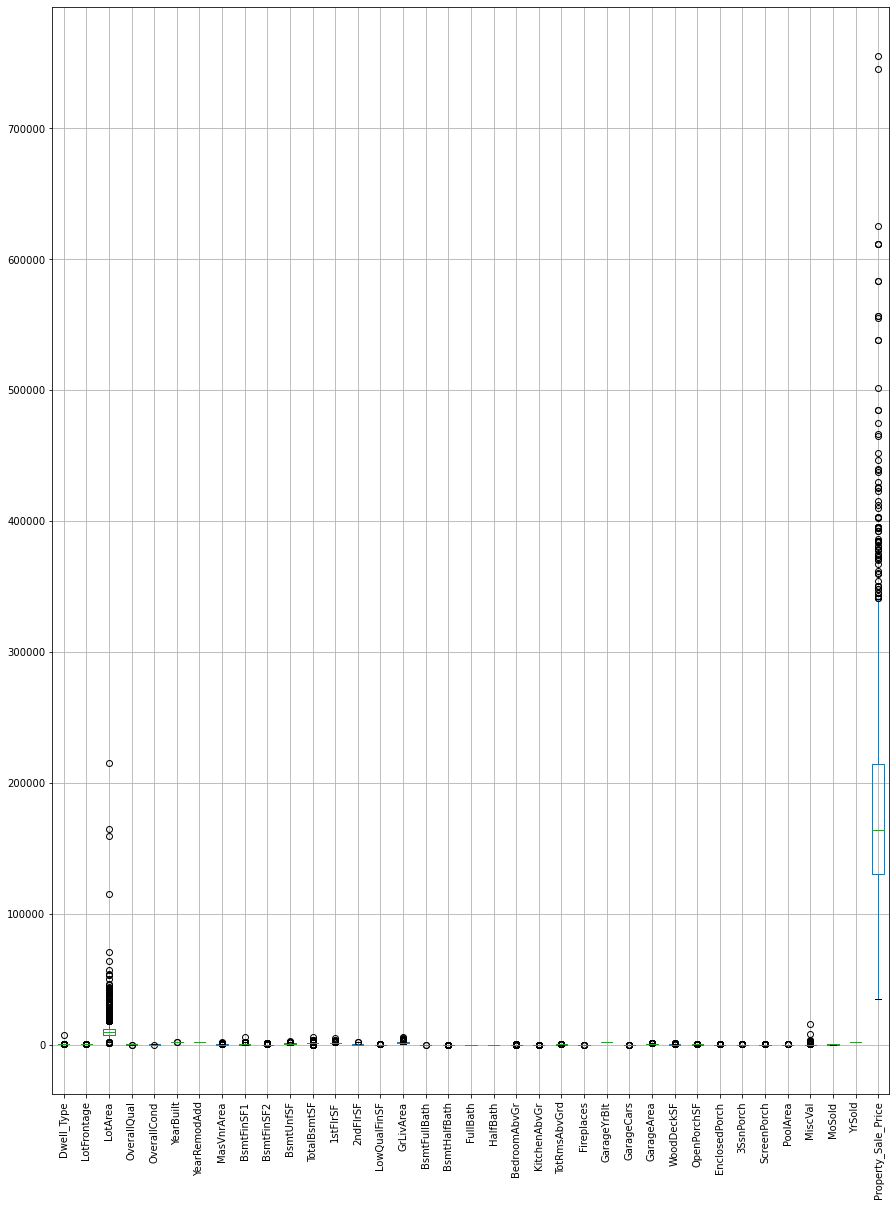

In [17]:
data.boxplot(rot=90,figsize=(15,20))

for i in num:
    print("display(sns.boxplot(data['"+i+"']))")

i=0
for m in range(1,len(num)+1):
    for n in range(1,7):
        if i<=38:
            print("plt.subplot(",m,",",len(num),",",n,")")
            i=i+1
for l in num:
         print("plt.boxplot(data['"+l+"'])")

In [18]:
for i in num:
    print("q3 = data['"+i+"'].quantile(0.75)")
    print("q1 = data['"+i+"'].quantile(0.25)")
    print("IQR = q3 - q1")
    print("UE = q3 + (1.5 * IQR)")
    print("LE = q1 - (1.5 * IQR)")
    print("data['"+i+"'][data['"+i+"']> UE] = UE")

q3 = data['Dwell_Type'].quantile(0.75)
q1 = data['Dwell_Type'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['Dwell_Type'][data['Dwell_Type']> UE] = UE
q3 = data['LotFrontage'].quantile(0.75)
q1 = data['LotFrontage'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['LotFrontage'][data['LotFrontage']> UE] = UE
q3 = data['LotArea'].quantile(0.75)
q1 = data['LotArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['LotArea'][data['LotArea']> UE] = UE
q3 = data['OverallQual'].quantile(0.75)
q1 = data['OverallQual'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['OverallQual'][data['OverallQual']> UE] = UE
q3 = data['OverallCond'].quantile(0.75)
q1 = data['OverallCond'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['OverallCond'][data['OverallCond']> UE] = UE
q3 = data['YearBuilt'].quantile(0.75)
q1 = data['YearBuilt'].quantile(0.25)
IQR 

In [19]:
q3 = data['Dwell_Type'].quantile(0.75)
q1 = data['Dwell_Type'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['Dwell_Type'][data['Dwell_Type']> UE] = UE
q3 = data['LotFrontage'].quantile(0.75)
q1 = data['LotFrontage'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['LotFrontage'][data['LotFrontage']> UE] = UE
q3 = data['LotArea'].quantile(0.75)
q1 = data['LotArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['LotArea'][data['LotArea']> UE] = UE
q3 = data['OverallQual'].quantile(0.75)
q1 = data['OverallQual'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['OverallQual'][data['OverallQual']> UE] = UE
q3 = data['OverallCond'].quantile(0.75)
q1 = data['OverallCond'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['OverallCond'][data['OverallCond']> UE] = UE
q3 = data['YearBuilt'].quantile(0.75)
q1 = data['YearBuilt'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['YearBuilt'][data['YearBuilt']> UE] = UE
q3 = data['YearRemodAdd'].quantile(0.75)
q1 = data['YearRemodAdd'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['YearRemodAdd'][data['YearRemodAdd']> UE] = UE
q3 = data['MasVnrArea'].quantile(0.75)
q1 = data['MasVnrArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['MasVnrArea'][data['MasVnrArea']> UE] = UE
q3 = data['BsmtFinSF1'].quantile(0.75)
q1 = data['BsmtFinSF1'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BsmtFinSF1'][data['BsmtFinSF1']> UE] = UE
q3 = data['BsmtFinSF2'].quantile(0.75)
q1 = data['BsmtFinSF2'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BsmtFinSF2'][data['BsmtFinSF2']> UE] = UE
q3 = data['BsmtUnfSF'].quantile(0.75)
q1 = data['BsmtUnfSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BsmtUnfSF'][data['BsmtUnfSF']> UE] = UE
q3 = data['TotalBsmtSF'].quantile(0.75)
q1 = data['TotalBsmtSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['TotalBsmtSF'][data['TotalBsmtSF']> UE] = UE
q3 = data['1stFlrSF'].quantile(0.75)
q1 = data['1stFlrSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['1stFlrSF'][data['1stFlrSF']> UE] = UE
q3 = data['2ndFlrSF'].quantile(0.75)
q1 = data['2ndFlrSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['2ndFlrSF'][data['2ndFlrSF']> UE] = UE
q3 = data['LowQualFinSF'].quantile(0.75)
q1 = data['LowQualFinSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['LowQualFinSF'][data['LowQualFinSF']> UE] = UE
q3 = data['GrLivArea'].quantile(0.75)
q1 = data['GrLivArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['GrLivArea'][data['GrLivArea']> UE] = UE
q3 = data['BsmtFullBath'].quantile(0.75)
q1 = data['BsmtFullBath'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BsmtFullBath'][data['BsmtFullBath']> UE] = UE
q3 = data['BsmtHalfBath'].quantile(0.75)
q1 = data['BsmtHalfBath'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BsmtHalfBath'][data['BsmtHalfBath']> UE] = UE
q3 = data['FullBath'].quantile(0.75)
q1 = data['FullBath'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['FullBath'][data['FullBath']> UE] = UE
q3 = data['HalfBath'].quantile(0.75)
q1 = data['HalfBath'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['HalfBath'][data['HalfBath']> UE] = UE
q3 = data['BedroomAbvGr'].quantile(0.75)
q1 = data['BedroomAbvGr'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['BedroomAbvGr'][data['BedroomAbvGr']> UE] = UE
q3 = data['KitchenAbvGr'].quantile(0.75)
q1 = data['KitchenAbvGr'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['KitchenAbvGr'][data['KitchenAbvGr']> UE] = UE
q3 = data['TotRmsAbvGrd'].quantile(0.75)
q1 = data['TotRmsAbvGrd'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['TotRmsAbvGrd'][data['TotRmsAbvGrd']> UE] = UE
q3 = data['Fireplaces'].quantile(0.75)
q1 = data['Fireplaces'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['Fireplaces'][data['Fireplaces']> UE] = UE
q3 = data['GarageYrBlt'].quantile(0.75)
q1 = data['GarageYrBlt'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['GarageYrBlt'][data['GarageYrBlt']> UE] = UE
q3 = data['GarageCars'].quantile(0.75)
q1 = data['GarageCars'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['GarageCars'][data['GarageCars']> UE] = UE
q3 = data['GarageArea'].quantile(0.75)
q1 = data['GarageArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['GarageArea'][data['GarageArea']> UE] = UE
q3 = data['WoodDeckSF'].quantile(0.75)
q1 = data['WoodDeckSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['WoodDeckSF'][data['WoodDeckSF']> UE] = UE
q3 = data['OpenPorchSF'].quantile(0.75)
q1 = data['OpenPorchSF'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['OpenPorchSF'][data['OpenPorchSF']> UE] = UE
q3 = data['EnclosedPorch'].quantile(0.75)
q1 = data['EnclosedPorch'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['EnclosedPorch'][data['EnclosedPorch']> UE] = UE
q3 = data['3SsnPorch'].quantile(0.75)
q1 = data['3SsnPorch'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['3SsnPorch'][data['3SsnPorch']> UE] = UE
q3 = data['ScreenPorch'].quantile(0.75)
q1 = data['ScreenPorch'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['ScreenPorch'][data['ScreenPorch']> UE] = UE
q3 = data['PoolArea'].quantile(0.75)
q1 = data['PoolArea'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['PoolArea'][data['PoolArea']> UE] = UE
q3 = data['MiscVal'].quantile(0.75)
q1 = data['MiscVal'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['MiscVal'][data['MiscVal']> UE] = UE
q3 = data['MoSold'].quantile(0.75)
q1 = data['MoSold'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['MoSold'][data['MoSold']> UE] = UE
q3 = data['YrSold'].quantile(0.75)
q1 = data['YrSold'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['YrSold'][data['YrSold']> UE] = UE
q3 = data['Property_Sale_Price'].quantile(0.75)
q1 = data['Property_Sale_Price'].quantile(0.25)
IQR = q3 - q1
UE = q3 + (1.5 * IQR)
LE = q1 - (1.5 * IQR)
data['Property_Sale_Price'][data['Property_Sale_Price']> UE] = UE


In [20]:
for j in col:
    print("display('",j,"')"," ,display(data['"+j+"'].unique())")

display(' Dwell_Type ')  ,display(data['Dwell_Type'].unique())
display(' Zone_Class ')  ,display(data['Zone_Class'].unique())
display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' LotArea ')  ,display(data['LotArea'].unique())
display(' Road_Type ')  ,display(data['Road_Type'].unique())
display(' Alley ')  ,display(data['Alley'].unique())
display(' Property_Shape ')  ,display(data['Property_Shape'].unique())
display(' LandContour ')  ,display(data['LandContour'].unique())
display(' Utilities ')  ,display(data['Utilities'].unique())
display(' LotConfig ')  ,display(data['LotConfig'].unique())
display(' LandSlope ')  ,display(data['LandSlope'].unique())
display(' Neighborhood ')  ,display(data['Neighborhood'].unique())
display(' Condition1 ')  ,display(data['Condition1'].unique())
display(' Condition2 ')  ,display(data['Condition2'].unique())
display(' Dwelling_Type ')  ,display(data['Dwelling_Type'].unique())
display(' HouseStyle ')  ,display(data['HouseStyle'].uniq

In [21]:
display(' Dwell_Type ')  ,display(data['Dwell_Type'].unique())
display(' Zone_Class ')  ,display(data['Zone_Class'].unique())
display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' LotArea ')  ,display(data['LotArea'].unique())
display(' Road_Type ')  ,display(data['Road_Type'].unique())
display(' Alley ')  ,display(data['Alley'].unique())
display(' Property_Shape ')  ,display(data['Property_Shape'].unique())
display(' LandContour ')  ,display(data['LandContour'].unique())
display(' Utilities ')  ,display(data['Utilities'].unique())
display(' LotConfig ')  ,display(data['LotConfig'].unique())
display(' LandSlope ')  ,display(data['LandSlope'].unique())
display(' Neighborhood ')  ,display(data['Neighborhood'].unique())
display(' Condition1 ')  ,display(data['Condition1'].unique())
display(' Condition2 ')  ,display(data['Condition2'].unique())
display(' Dwelling_Type ')  ,display(data['Dwelling_Type'].unique())
display(' HouseStyle ')  ,display(data['HouseStyle'].unique())
display(' OverallQual ')  ,display(data['OverallQual'].unique())
display(' OverallCond ')  ,display(data['OverallCond'].unique())
display(' YearBuilt ')  ,display(data['YearBuilt'].unique())
display(' YearRemodAdd ')  ,display(data['YearRemodAdd'].unique())
display(' RoofStyle ')  ,display(data['RoofStyle'].unique())
display(' RoofMatl ')  ,display(data['RoofMatl'].unique())
display(' Exterior1st ')  ,display(data['Exterior1st'].unique())
display(' Exterior2nd ')  ,display(data['Exterior2nd'].unique())
display(' MasVnrType ')  ,display(data['MasVnrType'].unique())
display(' MasVnrArea ')  ,display(data['MasVnrArea'].unique())
display(' ExterQual ')  ,display(data['ExterQual'].unique())
display(' ExterCond ')  ,display(data['ExterCond'].unique())
display(' Foundation ')  ,display(data['Foundation'].unique())
display(' BsmtQual ')  ,display(data['BsmtQual'].unique())
display(' BsmtCond ')  ,display(data['BsmtCond'].unique())
display(' BsmtExposure ')  ,display(data['BsmtExposure'].unique())
display(' BsmtFinType1 ')  ,display(data['BsmtFinType1'].unique())
display(' BsmtFinSF1 ')  ,display(data['BsmtFinSF1'].unique())
display(' BsmtFinType2 ')  ,display(data['BsmtFinType2'].unique())
display(' BsmtFinSF2 ')  ,display(data['BsmtFinSF2'].unique())
display(' BsmtUnfSF ')  ,display(data['BsmtUnfSF'].unique())
display(' TotalBsmtSF ')  ,display(data['TotalBsmtSF'].unique())
display(' Heating ')  ,display(data['Heating'].unique())
display(' HeatingQC ')  ,display(data['HeatingQC'].unique())
display(' CentralAir ')  ,display(data['CentralAir'].unique())
display(' Electrical ')  ,display(data['Electrical'].unique())
display(' 1stFlrSF ')  ,display(data['1stFlrSF'].unique())
display(' 2ndFlrSF ')  ,display(data['2ndFlrSF'].unique())
display(' LowQualFinSF ')  ,display(data['LowQualFinSF'].unique())
display(' GrLivArea ')  ,display(data['GrLivArea'].unique())
display(' BsmtFullBath ')  ,display(data['BsmtFullBath'].unique())
display(' BsmtHalfBath ')  ,display(data['BsmtHalfBath'].unique())
display(' FullBath ')  ,display(data['FullBath'].unique())
display(' HalfBath ')  ,display(data['HalfBath'].unique())
display(' BedroomAbvGr ')  ,display(data['BedroomAbvGr'].unique())
display(' KitchenAbvGr ')  ,display(data['KitchenAbvGr'].unique())
display(' KitchenQual ')  ,display(data['KitchenQual'].unique())
display(' TotRmsAbvGrd ')  ,display(data['TotRmsAbvGrd'].unique())
display(' Functional ')  ,display(data['Functional'].unique())
display(' Fireplaces ')  ,display(data['Fireplaces'].unique())
display(' FireplaceQu ')  ,display(data['FireplaceQu'].unique())
display(' GarageType ')  ,display(data['GarageType'].unique())
display(' GarageYrBlt ')  ,display(data['GarageYrBlt'].unique())
display(' GarageFinish ')  ,display(data['GarageFinish'].unique())
display(' GarageCars ')  ,display(data['GarageCars'].unique())
display(' GarageArea ')  ,display(data['GarageArea'].unique())
display(' GarageQual ')  ,display(data['GarageQual'].unique())
display(' GarageCond ')  ,display(data['GarageCond'].unique())
display(' PavedDrive ')  ,display(data['PavedDrive'].unique())
display(' WoodDeckSF ')  ,display(data['WoodDeckSF'].unique())
display(' OpenPorchSF ')  ,display(data['OpenPorchSF'].unique())
display(' EnclosedPorch ')  ,display(data['EnclosedPorch'].unique())
display(' 3SsnPorch ')  ,display(data['3SsnPorch'].unique())
display(' ScreenPorch ')  ,display(data['ScreenPorch'].unique())
display(' PoolArea ')  ,display(data['PoolArea'].unique())
display(' PoolQC ')  ,display(data['PoolQC'].unique())
display(' Fence ')  ,display(data['Fence'].unique())
display(' MiscFeature ')  ,display(data['MiscFeature'].unique())
display(' MiscVal ')  ,display(data['MiscVal'].unique())
display(' MoSold ')  ,display(data['MoSold'].unique())
display(' YrSold ')  ,display(data['YrSold'].unique())
display(' SaleType ')  ,display(data['SaleType'].unique())
display(' SaleCondition ')  ,display(data['SaleCondition'].unique())
display(' Property_Sale_Price ')  ,display(data['Property_Sale_Price'].unique())

' Dwell_Type '

array([ 60,  20,  70,  50, 145,  45,  90, 120,  30,  85,  80,  75,  40],
      dtype=int64)

' Zone_Class '

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

' LotFrontage '

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  70.,  51.,  50.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108.,  74.,  61.,
        48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,  95.,  69.,
        21.,  32.,  78.,  40., 105.,  73.,  77.,  64.,  94.,  34.,  90.,
        55.,  88.,  82.,  71., 107.,  92.,  62.,  86.,  97.,  54.,  41.,
        79.,  99.,  67.,  83.,  43., 103.,  93.,  30.,  35.,  37.,  87.,
        49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,  53.,  45.,
       106., 104.,  42.,  39.,  46.])

' LotArea '

array([ 8450.,  9600., 11250., ..., 10353., 11291.,  9004.])

' Road_Type '

array(['Pave', 'Grvl'], dtype=object)

' Alley '

array(['Grvl', 'Pave'], dtype=object)

' Property_Shape '

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

' LandContour '

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

' Utilities '

array(['AllPub', 'NoSeWa'], dtype=object)

' LotConfig '

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

' LandSlope '

array(['Gtl', 'Mod', 'Sev'], dtype=object)

' Neighborhood '

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

' Condition1 '

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

' Condition2 '

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

' Dwelling_Type '

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

' HouseStyle '

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

' OverallQual '

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

' OverallCond '

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

' YearBuilt '

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1902, 1943, 1944, 1909, 1903], dtype=int64)

' YearRemodAdd '

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974, 2017, 2011, 2014, 2016, 2020,
       2012, 2018, 2015, 2023, 2022, 2019], dtype=int64)

' RoofStyle '

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

' RoofMatl '

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

' Exterior1st '

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

' Exterior2nd '

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

' MasVnrType '

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

' MasVnrArea '

array([196.,   0., 162., 350., 186., 240., 286., 306., 212., 180., 380.,
       281., 400., 200., 246., 132.,  75., 272., 178., 344., 287., 167.,
        44., 104.,  57.,  63., 284.,  47., 203.,  77., 183.,  41.,  69.,
       336., 220., 184., 116., 135., 266.,  58., 309., 136., 288.,  83.,
       320.,  54., 120., 252.,  38., 226., 300., 112., 268.,  67., 275.,
       138.,  25., 205., 262., 128., 260., 153.,  26., 312.,  89., 142.,
       290., 127.,  76., 297.,  78., 254., 102., 108., 302., 172., 399.,
       270., 210., 174., 348., 315., 299., 340.,  81., 166.,  40.,  55.,
       238., 365.,  61., 150., 278., 256., 225., 370., 388., 175.,  27.,
       296., 146., 113., 176.,  70., 106., 362., 247., 305.,  17.,  28.,
       255., 125.,  97., 126., 145., 232., 376.,  21.,  64., 161., 110.,
       224., 248.,  32., 304., 215., 378., 168.,  52., 285., 360.,  99.,
       333., 219., 188.,  92., 182., 250., 292.,  94., 245., 207., 335.,
       100., 208., 170.,  87., 280.,  46., 192., 20

' ExterQual '

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

' ExterCond '

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

' Foundation '

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

' BsmtQual '

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

' BsmtCond '

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

' BsmtExposure '

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

' BsmtFinType1 '

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

' BsmtFinSF1 '

array([ 706,  978,  486,  216,  655,  732, 1369,  859,    0,  851,  906,
        998,  737,  733,  578,  646,  504,  840,  188,  234, 1218, 1277,
       1018, 1153, 1213,  731,  643,  967,  747,  280,  179,  456, 1351,
         24,  763,  182,  104, 1770,  384,  490,  649,  632,  941,  739,
        912, 1013,  603,  565,  320,  462,  228,  336,  448, 1201,   33,
        588,  600,  713, 1046,  648,  310, 1162,  520,  108,  569, 1200,
        224,  705,  444,  250,  984,   35,  774,  419,  170, 1470,  938,
        570,  300,  120,  116,  512,  567,  445,  695,  405, 1005,  668,
        821,  432, 1300,  507,  679, 1332,  209,  680,  716, 1400,  416,
        429,  222,   57,  660, 1016,  370,  351,  379, 1288,  360,  639,
        495,  288, 1398,  477,  831,  436,  352,  611, 1086,  297,  626,
        560,  390,  566, 1126, 1036, 1088,  641,  617,  662,  312, 1065,
        787,  468,   36,  822,  378,  946,  341,   16,  550,  524,   56,
        321,  842,  689,  625,  358,  402,   94, 10

' BsmtFinType2 '

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

' BsmtFinSF2 '

array([0], dtype=int64)

' BsmtUnfSF '

array([ 150,  284,  434,  540,  490,   64,  317,  216,  952,  140,  134,
        177,  175, 1494,  520,  832,  426,    0,  468,  525, 1158,  637,
       1698,  200,  204, 1566,  180,  486,  207,  649, 1228, 1234,  380,
        408, 1117, 1097,   84,  326,  445,  383,  167,  465, 1296,   83,
       1632,  736,  192,  612,  816,   32,  935,  321,  860, 1410,  148,
        217,  530, 1346,  576,  318, 1143, 1035,  440,  747,  701,  343,
        280,  404,  840,  724,  295,  448,   36, 1530, 1065,  384, 1288,
        684, 1013,  402,  635,  163,  168,  176,  370,  350,  381,  410,
        741, 1226, 1053,  641,  516,  793, 1139,  550,  905,  104,  310,
        252, 1125,  203,  728,  732,  510,  899, 1362,   30,  958,  556,
        413,  479,  297,  658,  262,  891, 1304,  519,  336,  107,  432,
        403,  811,  396,  970,  506,  884,  400,  896,  253,  409,   93,
       1200,  572,  774,  769, 1335,  340,  882,  779,  112,  470,  294,
       1686,  360,  441,  354,  700,  725,  320,  5

' TotalBsmtSF '

array([ 856. , 1262. ,  920. ,  756. , 1145. ,  796. , 1686. , 1107. ,
        952. ,  991. , 1040. , 1175. ,  912. , 1494. , 1253. ,  832. ,
       1004. ,    0. , 1114. , 1029. , 1158. ,  637. , 1777. , 1060. ,
       1566. ,  900. , 1704. , 1484. ,  520. ,  649. , 1228. , 1234. ,
       1398. , 1561. , 1117. , 1097. , 1297. , 1057. , 1088. , 1350. ,
        840. ,  938. , 1150. , 1752. , 1434. , 1656. ,  736. ,  955. ,
        794. ,  816. , 1842. ,  384. , 1425. ,  970. ,  860. , 1410. ,
        780. ,  530. , 1370. ,  576. , 1143. , 1947. , 1453. ,  747. ,
       1304. , 2036.5,  845. , 1086. ,  462. ,  672. , 1768. ,  440. ,
        896. , 1237. , 1563. , 1065. , 1288. ,  684. ,  612. , 1013. ,
        990. , 1235. ,  876. , 1214. ,  824. ,  680. , 1588. ,  960. ,
        458. ,  950. , 1610. ,  741. , 1226. , 1053. ,  641. ,  789. ,
        793. , 1844. ,  994. , 1264. , 1809. , 1028. ,  729. , 1092. ,
       1125. , 1673. ,  728. ,  732. , 1080. , 1199. , 1362. , 1078. ,
      

' Heating '

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

' HeatingQC '

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

' CentralAir '

array(['Y', 'N'], dtype=object)

' Electrical '

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

' 1stFlrSF '

array([ 856. , 1262. ,  920. ,  961. , 1145. ,  796. , 1694. , 1107. ,
       1022. , 1077. , 1040. , 1182. ,  912. , 1494. , 1253. ,  854. ,
       1004. , 1296. , 1114. , 1339. , 1158. , 1108. , 1795. , 1060. ,
       1600. ,  900. , 1704. ,  520. ,  649. , 1228. , 1234. , 1700. ,
       1561. , 1132. , 1097. , 1297. , 1057. , 1152. , 1324. , 1328. ,
        884. ,  938. , 1150. , 1752. , 1518. , 1656. ,  736. ,  955. ,
        794. ,  816. , 1842. , 1360. , 1425. ,  983. ,  860. , 1426. ,
        780. ,  581. , 1370. ,  902. , 1143. , 2136.5, 1479. ,  747. ,
       1304. ,  845. ,  885. , 1086. ,  840. ,  526. ,  952. , 1072. ,
       1768. ,  682. , 1337. , 1563. , 1065. ,  804. , 1301. ,  684. ,
        612. , 1013. ,  990. , 1235. ,  964. , 1260. ,  905. ,  680. ,
       1588. ,  960. ,  835. , 1225. , 1610. ,  977. , 1535. , 1226. ,
       1053. , 1047. ,  789. ,  997. , 1844. , 1216. ,  774. , 1282. ,
       1436. ,  729. , 1092. , 1125. , 1699. ,  728. ,  988. ,  772. ,
      

' 2ndFlrSF '

array([ 854,    0,  866,  756, 1053,  566,  983,  752, 1142, 1218,  668,
       1320,  631,  716,  676,  860, 1519,  530,  808,  977, 1330,  833,
        765,  462,  213,  548,  960,  670, 1116,  876,  612, 1031,  881,
        790,  755,  592,  939,  520,  639,  656, 1414,  884,  729, 1523,
        728,  351,  688,  941, 1032,  848,  836,  475,  739, 1151,  448,
        896,  524, 1194,  956, 1070, 1096,  467,  547,  551,  880,  703,
        901,  720,  316, 1518,  704, 1178,  754,  601, 1360,  929,  445,
        564,  882,  920,  518,  817, 1257,  741,  672, 1306,  504, 1304,
       1100,  730,  689,  591,  888, 1020,  828,  700,  842, 1286,  864,
        829, 1092,  709,  844, 1106,  596,  807,  625,  649,  698,  840,
        780,  568,  795,  648,  975,  702, 1242, 1818, 1121,  371,  804,
        325,  809, 1200,  871, 1274, 1347, 1332, 1177, 1080,  695,  167,
        915,  576,  605,  862,  495,  403,  838,  517, 1427,  784,  711,
        468, 1081,  886,  793,  665,  858,  874,  5

' LowQualFinSF '

array([0], dtype=int64)

' GrLivArea '

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077, 1040,
       2324,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 2376, 1108,
       1795, 1060, 1600,  900, 1704,  520, 1317, 1228, 1234, 1700, 1561,
       2452, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       2149, 1656, 1452,  955, 1470, 1176,  816, 1842, 1360, 1425, 1739,
       1720, 2791,  780, 1158, 1111, 1370, 2034, 2473, 2207, 1479,  747,
       2287, 2223,  845, 1718, 1086, 1605,  988,  952, 1285, 1768, 1230,
       2142, 1337, 1563, 1065, 1474, 2417, 1560, 1224, 1526,  990, 1235,
        964, 2291, 1588,  960,  835, 1225, 1610, 1732, 1535, 1226, 1818,
       1992, 1047,  789, 1517, 1844, 1855, 1430, 2696, 2259, 2320, 1458,
       1092, 1125, 1456, 1123, 1080, 1199, 1586,  754,  958,  840, 1348,
       1053, 2157, 2054, 1327, 1721, 1682, 1214, 1959, 1852, 1764,  864,
       1734, 1385, 1501, 1728, 1709,  875, 2035, 1344,  969, 1993, 1252,
       1200, 1096, 1968, 1947, 2462, 1232, 2668, 15

' BsmtFullBath '

array([1. , 0. , 2. , 2.5])

' BsmtHalfBath '

array([0], dtype=int64)

' FullBath '

array([2, 1, 3, 0], dtype=int64)

' HalfBath '

array([1, 0, 2], dtype=int64)

' BedroomAbvGr '

array([3. , 4. , 1. , 2. , 0. , 4.5])

' KitchenAbvGr '

array([1, 0], dtype=int64)

' KitchenQual '

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

' TotRmsAbvGrd '

array([ 8,  6,  7,  9,  5, 10,  4,  3,  2], dtype=int64)

' Functional '

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

' Fireplaces '

array([0. , 1. , 2. , 2.5])

' FireplaceQu '

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

' GarageType '

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

' GarageYrBlt '

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1927., 1920.,
       1966., 1959., 1995., 1954., 1953., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1910.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1978., 1982., 1992., 1925., 1941.,
       2010., 1947., 1937., 1942., 1938., 1952., 1928., 1922., 1934.,
       1906., 1914., 1946., 1908., 1929., 1933., 2014., 2017., 2016.,
       2013., 2019., 2015.])

' GarageFinish '

array(['RFn', 'Unf', 'Fin'], dtype=object)

' GarageCars '

array([2. , 3. , 1. , 0. , 3.5])

' GarageArea '

array([548, 460, 608, 642, 836, 480, 636, 484, 468, 205, 384, 736, 352,
       840, 576, 516, 294, 853, 280, 534, 572, 270, 890, 772, 319, 240,
       250, 271, 447, 556, 691, 672, 498, 246,   0, 440, 308, 504, 300,
       670, 826, 386, 388, 528, 894, 565, 641, 288, 645, 852, 558, 220,
       667, 360, 427, 490, 379, 297, 283, 509, 405, 758, 461, 400, 462,
       420, 432, 506, 684, 472, 366, 476, 410, 740, 648, 273, 546, 325,
       792, 450, 180, 430, 594, 390, 540, 264, 530, 435, 453, 750, 487,
       624, 471, 318, 766, 660, 470, 720, 577, 380, 434, 866, 495, 564,
       312, 625, 680, 678, 726, 532, 216, 303, 789, 511, 616, 521, 451,
       936, 252, 497, 682, 666, 786, 795, 856, 473, 398, 500, 349, 454,
       644, 299, 210, 431, 438, 675, 721, 336, 810, 494, 457, 818, 463,
       604, 389, 538, 520, 309, 429, 673, 884, 868, 492, 413, 924, 439,
       671, 338, 573, 732, 505, 575, 626, 898, 529, 685, 281, 539, 418,
       588, 282, 375, 683, 843, 552, 870, 888, 746, 708, 513, 65

' GarageQual '

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

' GarageCond '

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

' PavedDrive '

array(['Y', 'N', 'P'], dtype=object)

' WoodDeckSF '

array([  0, 298, 192,  40, 255, 235,  90, 147, 140, 160,  48, 240, 171,
       100, 406, 222, 288,  49, 203, 113, 392, 145, 196, 168, 112, 106,
       420, 115, 120,  12, 301, 144, 300,  74, 127, 232, 158, 352, 182,
       180, 166, 224,  80, 367,  53, 188, 105,  24,  98, 276, 200, 409,
       239, 400, 178, 237, 210, 116, 280, 104,  87, 132, 238, 149, 355,
        60, 139, 108, 351, 209, 216, 248, 143, 365, 370,  58, 197, 263,
       123, 138, 333, 250, 292,  95, 262,  81, 289, 124, 172, 110, 208,
       256, 302, 190, 340, 233, 184, 201, 142, 122, 155, 135, 306,  64,
       364, 353,  66, 159, 146, 296, 125,  44, 215, 264,  88,  89,  96,
       414, 206, 141, 260, 324, 156, 220,  38, 261, 126,  85, 270,  78,
       169, 320, 268,  72, 349,  42,  35, 326, 382, 161, 179, 103, 253,
       148, 335, 176, 390, 328, 312, 185, 269, 195,  57, 236, 304, 198,
        28, 316, 322, 307, 257, 219, 416, 344, 380,  68, 114, 327, 165,
       187, 181,  92, 228, 245, 315, 241, 303, 133, 403,  36,  5

' OpenPorchSF '

array([ 61. ,   0. ,  42. ,  35. ,  84. ,  30. ,  57. , 167.5,   4. ,
        21. ,  33. , 112. , 102. , 154. , 159. , 110. ,  90. ,  56. ,
        32. ,  50. ,  54. ,  65. ,  38. ,  47. ,  64. ,  52. , 138. ,
       104. ,  82. ,  43. , 146. ,  75. ,  72. ,  70. ,  49. ,  11. ,
        36. , 151. ,  29. ,  94. , 101. ,  99. , 162. ,  63. ,  68. ,
        46. ,  45. , 122. , 120. ,  20. ,  24. , 130. , 108. ,  80. ,
        66. ,  48. ,  25. ,  96. , 111. , 106. ,  40. , 114. ,   8. ,
       136. , 132. ,  62. ,  60. ,  27. ,  74. ,  16. ,  26. ,  83. ,
        34. ,  55. ,  22. ,  98. , 119. , 105. , 140. ,  28. ,  39. ,
       148. ,  12. ,  51. , 150. , 117. ,  10. ,  81. ,  44. , 144. ,
       128. ,  76. ,  17. ,  59. , 121. ,  53. , 134. , 123. ,  78. ,
        85. , 133. , 113. , 137. , 125. , 100. ,  88. , 155. ,  73. ,
       158. , 142. , 124. ,  87. ,  23. , 152. , 116. , 160. ,  18. ,
       156. , 166. , 129. ,  77. ,  67. ,  69. , 131. ,  41. , 118. ,
       135. ,  95. ,

' EnclosedPorch '

array([0], dtype=int64)

' 3SsnPorch '

array([0], dtype=int64)

' ScreenPorch '

array([0], dtype=int64)

' PoolArea '

array([0], dtype=int64)

' PoolQC '

array(['Gd', 'Ex', 'Fa'], dtype=object)

' Fence '

array(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

' MiscFeature '

array(['Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

' MiscVal '

array([0], dtype=int64)

' MoSold '

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

' YrSold '

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

' SaleType '

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

' SaleCondition '

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

' Property_Sale_Price '

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 340000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 130000, 180500, 172500, 196500, 124900,
       158000, 101000, 202500, 219500, 317000, 180000, 226000,  80000,
       225000, 244000, 185000, 144900, 107400,  91000, 135750, 136500,
       193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500,
        85000, 123600, 109900,  98600, 163500, 133900, 204750, 214000,
        94750,  83000, 128950, 205000, 178000, 118964, 198900, 169500,
       100000, 115000, 190000, 136900, 217000, 259500, 176000, 155000,
       320000, 163990, 136000, 153900, 181000,  84500, 128000,  87000,
      

(None, None)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [23]:
le=preprocessing.LabelEncoder()

In [24]:
num

['Dwell_Type',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Property_Sale_Price']

In [25]:
for i in range(0,len(col)):
    if(col[i]!='Dwell_Type',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Property_Sale_Price'):
        data1 = le.fit(data[col[i]])
        x2 = data1.transform(data[col[i]])
        x2= pd.DataFrame(x2)
        data[col[i]]=x2

In [26]:
data.head(5)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,5,3,36,419,1,0,3,3,0,4,...,0,2,2,2,0,1,2,8,4,412
1,0,3,51,638,1,0,3,3,0,2,...,0,2,2,2,0,4,1,8,4,339
2,5,3,39,908,1,0,0,3,0,4,...,0,2,2,2,0,8,2,8,4,442
3,6,3,31,628,1,0,0,3,0,0,...,0,2,2,2,0,1,0,8,0,194
4,5,3,55,1166,1,0,0,3,0,2,...,0,2,2,2,0,11,2,8,4,494


In [27]:
y=data.Property_Sale_Price
y

0       412
1       339
2       442
3       194
4       494
       ... 
2068    423
2069    231
2070    203
2071    182
2072    136
Name: Property_Sale_Price, Length: 2073, dtype: int64

In [28]:
x=data.drop(["Property_Sale_Price"],axis=1)
x

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,419,1,0,3,3,0,4,...,0,0,2,2,2,0,1,2,8,4
1,0,3,51,638,1,0,3,3,0,2,...,0,0,2,2,2,0,4,1,8,4
2,5,3,39,908,1,0,0,3,0,4,...,0,0,2,2,2,0,8,2,8,4
3,6,3,31,628,1,0,0,3,0,0,...,0,0,2,2,2,0,1,0,8,0
4,5,3,55,1166,1,0,0,3,0,2,...,0,0,2,2,2,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,5,3,41,471,1,0,0,3,0,2,...,0,0,2,0,2,0,5,3,8,4
2069,10,3,34,312,1,0,0,3,0,4,...,0,0,2,2,2,0,7,1,7,0
2070,10,3,81,1253,1,0,3,2,0,4,...,0,0,2,2,2,0,5,1,8,4
2071,0,3,23,1170,1,0,0,3,1,1,...,0,0,2,2,2,0,0,3,0,0


In [29]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)

In [30]:
linearreg= LinearRegression().fit(trainx,trainy)
linearreg.predict(testx)
linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))


In [36]:
print("LinearRegression          = ",linearreg.score(testx,testy))
print("LinearRegression    rms   = ",linearrms)

LinearRegression          =  0.8740367093152458
LinearRegression    rms   =  7.759082114929239


In [32]:
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.897
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                     244.2
Date:                 Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                         21:38:42   Log-Likelihood:                -11200.
No. Observations:                 2073   AIC:                         2.254e+04
Df Residuals:                     2001   BIC:                         2.295e+04
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.5936     74.0

In [33]:
print(sm.OLS(y, sm.add_constant(x)).fit().summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.897
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                     244.2
Date:                 Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                         21:38:42   Log-Likelihood:                -11200.
No. Observations:                 2073   AIC:                         2.254e+04
Df Residuals:                     2001   BIC:                         2.295e+04
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.5936     74.0

In [34]:
col=x.columns
col

Index(['const', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea',
       'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Garag

In [35]:
for o in num:
    if o != 'Property_Sale_Price':
        print(sm.OLS(y, sm.add_constant(x[o])).fit().summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.430
Date:                 Tue, 16 Aug 2022   Prob (F-statistic):              0.232
Time:                         21:38:43   Log-Likelihood:                -13551.
No. Observations:                 2073   AIC:                         2.711e+04
Df Residuals:                     2071   BIC:                         2.712e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        297.1075      5.260     56.48

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.188
Model:                             OLS   Adj. R-squared:                  0.188
Method:                  Least Squares   F-statistic:                     480.5
Date:                 Tue, 16 Aug 2022   Prob (F-statistic):           5.83e-96
Time:                         21:38:43   Log-Likelihood:                -13335.
No. Observations:                 2073   AIC:                         2.667e+04
Df Residuals:                     2071   BIC:                         2.669e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          87.8774      9.907      8

import statsmodels.api as sm
import pandas as pd
 
# reading data from the csv
data = pd.read_csv('train.csv')
 
# defining the variables
x = data['x'].tolist()
y = data['y'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())